## Model the signup rate by user behavior

## Dataset Description

- city: city this user signed up in
    - city_King's Landing: this user signed up in *King's Landing*
    - city_Winterfell: this user signed up in *Winterfell*
    - city_Astapor: this user signed up in *Astapor*
- phone: primary device for this user
    - phone_Android: primary device for this user is Android
    - phone_iPhone: primary device for this user is iPhone
    - phone_no_phone: primary device for this user is unknown
- avg_dist: the average distance *(in miles) per trip taken in the first 30 days after signup 
- avg_rating_by_driver: the rider’s average rating over all of their trips 
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips 
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips 
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- luxury_car_user: True if the user took an luxury car in their first 30 days; False otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday
- churn: a user is regarded as churn if there is no trip made in last 30 days

In [1]:
## Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

# Always make it pretty.
plt.style.use('ggplot')

In [2]:
## show Chinese character
## source: https://jdhao.github.io/2017/05/13/guide-on-how-to-use-chinese-with-matplotlib/
##         https://stackoverflow.com/questions/25561009/how-do-you-i-use-mandarin-characters-in-matplotlib

import matplotlib as mpl
font_name = "STKaiti"
mpl.rcParams['font.family']=font_name
mpl.rcParams['axes.unicode_minus']=False # in case minus sign is shown as box

# plt.text(0.5, 0.5, s=u'测试')
# plt.show()

### Load data and browse data

In [3]:
# df = pd.read_csv('../data/sensors.csv', dtype='unicode')
df = pd.read_csv('../data/sensors_cleaned_user_signup.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11756 entries, 0 to 11755
Columns: 287 entries, distinct_id to hour_of_day_23
dtypes: float64(3), int64(240), object(44)
memory usage: 25.7+ MB


In [5]:
df.head()

,distinct_id,number_of_visit,browser,first_referrer,first_referrer_host,first_browser_language,first_visit_time,ip,is_first_day,is_first_time,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,00007ef910b6c9911f1b89d01a09aa3fc862f4a9,7,others,others,m.baidu.com,zh,2017-03-07 13:52:16.501,36.23.47.33,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000a216b72eff19bd0d5e17b9e676dd6ad9a38ac,1,chrome,no_first_referrer,no_first_referrer_host,no_first_browser_language,no_first_visit_time,111.193.183.253,1,1,...,0,0,0,0,0,0,0,0,0,0
2,000c46a27ef69fa22b56d253a9c72773338a1686,23,chrome,no_first_referrer,no_first_referrer_host,en,2017-03-07 13:48:56.25,27.38.250.222,0,0,...,0,0,0,0,0,0,0,0,0,0
3,000ed1dcd942969b458c5b308937c6389c08f999,5,others,others,others,zh,2017-03-13 11:29:36.672,116.226.32.214,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00111feff544ef5280a4c7064a362a9ea59c9389,2,no_brower,no_first_referrer,no_first_referrer_host,zh,2017-03-09 19:34:34.925,117.136.38.216,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Show summary stats
df.describe()

,number_of_visit,is_first_day,is_first_time,screen_height,screen_width,company,contact,email,isMsg,isSuccess,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
count,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.00000,11756.000000,11756.000000,11756.000000,...,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000
mean,6.387547,0.148860,0.050187,860.210871,1312.094420,0.039469,0.04066,0.039469,0.000085,0.000085,...,0.006465,0.004423,0.003573,0.001531,0.000766,0.000425,0.000510,0.000255,0.000255,0.000766
std,10.440768,0.355966,0.218340,176.008997,513.092087,0.194717,0.19751,0.194717,0.009223,0.009223,...,0.080147,0.066363,0.059667,0.039101,0.027659,0.020620,0.022587,0.015973,0.015973,0.027659
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,768.000000,1280.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,800.000000,1366.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,912.000000,1600.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,254.000000,1.000000,1.000000,2560.000000,3440.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.describe().columns.tolist()

['number_of_visit',
 'is_first_day',
 'is_first_time',
 'screen_height',
 'screen_width',
 'company',
 'contact',
 'email',
 'isMsg',
 'isSuccess',
 'name',
 'pageStayTime',
 'result',
 'verification_code',
 'time',
 'day_of_week',
 'hour_of_day',
 'signup',
 'browser_chrome',
 'browser_firefox',
 'browser_no_brower',
 'browser_others',
 'browser_safari',
 'first_referrer_https://www.baidu.com/baidu.php',
 'first_referrer_https://www.baidu.com/link',
 'first_referrer_https://www.baidu.com/s',
 'first_referrer_no_first_referrer',
 'first_referrer_others',
 'first_referrer_host_m.baidu.com',
 'first_referrer_host_no_first_referrer_host',
 'first_referrer_host_others',
 'first_referrer_host_www.baidu.com',
 'first_browser_language_en',
 'first_browser_language_no_first_browser_language',
 'first_browser_language_others',
 'first_browser_language_zh',
 'latest_referrer_https://www.baidu.com/baidu.php',
 'latest_referrer_https://www.baidu.com/link',
 'latest_referrer_https://www.baidu.com/s

In [8]:
col_len = df.columns.tolist()
col_len

['distinct_id',
 'number_of_visit',
 'browser',
 'first_referrer',
 'first_referrer_host',
 'first_browser_language',
 'first_visit_time',
 'ip',
 'is_first_day',
 'is_first_time',
 'latest_referrer',
 'latest_referrer_host',
 'latest_utm_campaign',
 'latest_utm_content',
 'latest_utm_medium',
 'latest_utm_source',
 'latest_utm_term',
 'model',
 'os',
 'referrer',
 'referrer_host',
 'screen_height',
 'screen_width',
 'title',
 'url',
 'url_path',
 'utm_campaign',
 'utm_content',
 'utm_medium',
 'utm_source',
 'utm_term',
 'latest_ch',
 'session_referrer',
 'session_referrer_host',
 'ch',
 'company',
 'contact',
 'email',
 'from_url',
 'isMsg',
 'isSuccess',
 'name',
 'page',
 'pagePosition',
 'pageStayTime',
 'pageUrl',
 'project_name',
 'referrHostUrl',
 'referrerUrl',
 'requestBtn',
 'result',
 'session_page_url',
 'siteUrl',
 'site_url',
 'verification_code',
 'type',
 'time',
 'time_formatted',
 'time_formatted_date',
 'day_of_week',
 'hour_of_day',
 'signup',
 'browser_chrome',
 '

In [9]:
len(col_len)

287

In [10]:
## X dimension: (11756, 239), 287 - 239 -1 (y:signup) = 47
## X excludes: 
## 1.'distinct_id'; 2. 'first_visit_time'; 3. 'ip'; 4.'browser'; 5.'first_referrer'; 6.'first_referrer_host';
## 7.'first_browser_language'; 8.'latest_referrer'; 9.'latest_referrer_host'; 10.'latest_utm_campaign';
## 11.'latest_utm_content'; 12.'latest_utm_medium'; 13.'latest_utm_source'; 14.'latest_utm_term'; 15.'model';
## 16.'os'; 17.'referrer'; 18.'referrer_host'; 19.'title'; 20.'url'; 21.'url_path'; 22.'utm_campaign', 23.'utm_content';
## 24.'utm_medium'; 25.'utm_source'; 26.'utm_term'; 27.'latest_ch'; 28.'session_referrer'; 29'session_referrer_host';
## 30.'ch'; 31.'from_url'; 32.'page'; 33.'pagePosition'; 34.'pageUrl'; 35.'project_name'; 36.'referrHostUrl'; 37.'referrerUrl';
## 38.'requestBtn'; 39.'session_page_url'; 40.'siteUrl'; 41.'site_url';42.'type'; 43.'time'; 44.'time_formatted';
## 45.'time_formatted_date'; 46.'day_of_week'; 47.'hour_of_day'

### Define Features and Target

In [11]:
selected_features = [u'number_of_visit', u'is_first_day', u'is_first_time', u'screen_height', u'screen_width', u'company',
                     u'contact', u'email', u'isMsg', u'isSuccess', u'name', u'pageStayTime', u'result', u'verification_code', 
                     u'browser_chrome', u'browser_firefox', u'browser_no_brower', u'browser_others', u'browser_safari',
                     u'first_referrer_https://www.baidu.com/baidu.php', u'first_referrer_https://www.baidu.com/link',
                     u'first_referrer_https://www.baidu.com/s', u'first_referrer_no_first_referrer', u'first_referrer_others',
                     u'first_referrer_host_m.baidu.com', u'first_referrer_host_no_first_referrer_host',
                     u'first_referrer_host_others', u'first_referrer_host_www.baidu.com', u'first_browser_language_en',
                     u'first_browser_language_no_first_browser_language', u'first_browser_language_others',
                     u'first_browser_language_zh', u'latest_referrer_https://www.baidu.com/baidu.php',
                     u'latest_referrer_https://www.baidu.com/link', u'latest_referrer_https://www.baidu.com/s',
                     u'latest_referrer_no_latest_referrer', u'latest_referrer_others', u'latest_referrer_host_36kr.com',
                     u'latest_referrer_host_m.baidu.com', u'latest_referrer_host_no_latest_referrer_host',
                     u'latest_referrer_host_others', u'latest_referrer_host_www.baidu.com', u'latest_referrer_host_www.sogou.com',
                     u'latest_utm_campaign_G-通用词', u'latest_utm_campaign_S-通用词', u'latest_utm_campaign_no_latest_utm_campaign',
                     u'latest_utm_campaign_others', u'latest_utm_campaign_品牌词', u'latest_utm_campaign_神策-移动推广',
                     u'latest_utm_campaign_通用词', u'latest_utm_campaign_首页', u'latest_utm_content_no_latest_utm_content',
                     u'latest_utm_content_others', u'latest_utm_content_品牌-神策', u'latest_utm_content_通用-数据分析',
                     u'latest_utm_content_通用-用户画像', u'latest_utm_content_通用词-M', u'latest_utm_content_通用词-三图',
                     u'latest_utm_medium_cpc', u'latest_utm_medium_mcpc', u'latest_utm_medium_mfeed',
                     u'latest_utm_medium_no_latest_utm_medium', u'latest_utm_medium_others', u'latest_utm_source_baidu',
                     u'latest_utm_source_google', u'latest_utm_source_no_latest_utm_source', u'latest_utm_source_others',
                     u'latest_utm_source_sogou', u'latest_utm_term_no_latest_utm_term', u'latest_utm_term_others',
                     u'latest_utm_term_用户画像', u'latest_utm_term_神策', u'model_android', u'model_iphone', u'model_mac',
                     u'model_no_model', u'model_others', u'model_pc', u'os_Android', u'os_iOS', u'os_linux', u'os_macosx',
                     u'os_no_os', u'os_windows', u'referrer_https://www.baidu.com/baidu.php', 
                     u'referrer_https://www.sensorsdata.cn/', u'referrer_no_referrer', u'referrer_others',
                     u'referrer_host_m.baidu.com', u'referrer_host_no_referrer_host', u'referrer_host_others',
                     u'referrer_host_sensorsdata.cn', u'referrer_host_www.baidu.com', u'referrer_host_www.sensorsdata.cn',
                     u'title_no_title', u'title_others', u'title_介绍 · Sensors Analytics 使用手册',
                     u'title_神策分析|Sensors Analytics-帮你实现数据驱动－demo',
                     u'title_神策分析|Sensors Analytics-帮你实现数据驱动－产品',
                     u'title_神策数据 | Sensors Data - 国内领先的用户行为分析产品',
                     u'url_https://www.sensorsdata.cn/',
                     u'url_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D',
                     u'url_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=mfeed&utm_term=%E9%A6%96%E9%A1%B5-%E9%80%9A%E7%94%A8%E8%AF%8D-%E4%B8%89%E5%9B%BE-%E5%9B%BE1&utm_content=%E9%80%9A%E7%94%A8%E8%AF%8D-%E4%B8%89%E5%9B%BE&utm_campaign=%E9%A6%96%E9%A1%B5',
                     u'url_https://www.sensorsdata.cn/demo.html', u'url_others', u'url_path_/tools/code_auto/', u'url_path_/tools/url_create.html',
                     u'url_path_no_url_path', u'utm_campaign_S-通用词', u'utm_campaign_no_utm_compaign', u'utm_campaign_others',
                     u'utm_campaign_神策-移动推广', u'utm_campaign_通用词', u'utm_campaign_首页', u'utm_content_no_utm_content',
                     u'utm_content_others', u'utm_content_通用-数据分析', u'utm_content_通用-用户画像', u'utm_content_通用词-M',
                     u'utm_content_通用词-三图', u'utm_medium_cpc', u'utm_medium_mcpc', u'utm_medium_mfeed',
                     u'utm_medium_no_utm_medium', u'utm_medium_others', u'utm_source_baidu', u'utm_source_google',
                     u'utm_source_no_utm_source', u'utm_source_others', u'utm_source_sogou', u'utm_term_no_utm_term',
                     u'utm_term_others', u'utm_term_数据分析', u'utm_term_用户画像', u'utm_term_神策',
                     u'utm_term_首页-通用词-三图-图1', u'latest_ch_demo', u'latest_ch_no_latest_ch', u'latest_ch_others',
                     u'latest_ch_zhihu', u'session_referrer_https://www.baidu.com/baidu.php',
                     u'session_referrer_https://www.baidu.com/link', u'session_referrer_https://www.baidu.com/s',
                     u'session_referrer_no_session_referrer', u'session_referrer_others', u'session_referrer_host_m.baidu.com',
                     u'session_referrer_host_no_session_referrer_host', u'session_referrer_host_others',
                     u'session_referrer_host_www.baidu.com', u'ch_demo', u'ch_no_ch', u'ch_others', u'ch_zhihu', u'from_url_baidu',
                     u'from_url_demo', u'from_url_no_from_url', u'from_url_others', u'page_about', u'page_courses_index',
                     u'page_demo', u'page_index', u'page_no_page', u'pagePosition_1.0', u'pagePosition_2.0',
                     u'pagePosition_3.0', u'pagePosition_4.0', u'pagePosition_no_pagePosition',
                     u'pageUrl_https://www.sensorsdata.cn/',
                     u'pageUrl_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D',
                     u'pageUrl_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%A5%9E%E7%AD%96&utm_content=%E5%93%81%E7%89%8C%2D%E7%A5%9E%E7%AD%96&utm_campaign=%E5%93%81%E7%89%8C%E8%AF%8D',
                     u'pageUrl_https://www.sensorsdata.cn/demo.html', u'pageUrl_no_pageUrl', u'pageUrl_others', u'project_name_default',
                     u'project_name_hunter', u'project_name_no_project_name', u'project_name_production',
                     u'referrHostUrl_no_referrHostUrl', u'referrHostUrl_others', u'referrHostUrl_www.baidu.com',
                     u'referrHostUrl_www.sogou.com', u'referrerUrl_https://www.baidu.com/baidu.php',
                     u'referrerUrl_https://www.baidu.com/link', u'referrerUrl_https://www.baidu.com/s',
                     u'referrerUrl_no_referrerUrl', u'referrerUrl_others', u'requestBtn_1.0', u'requestBtn_10.0',
                     u'requestBtn_2.0', u'requestBtn_3.0', u'requestBtn_4.0', u'requestBtn_6.0', u'requestBtn_7.0',
                     u'requestBtn_no_requestBtn', u'session_page_url_https://www.sensorsdata.cn/',
                     u'session_page_url_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D',
                     u'session_page_url_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=mfeed&utm_term=%E9%A6%96%E9%A1%B5-%E9%80%9A%E7%94%A8%E8%AF%8D-%E4%B8%89%E5%9B%BE-%E5%9B%BE1&utm_content=%E9%80%9A%E7%94%A8%E8%AF%8D-%E4%B8%89%E5%9B%BE&utm_campaign=%E9%A6%96%E9%A1%B5',
                     u'session_page_url_no_session_page_url', u'session_page_url_others', u'siteUrl_https://www.sensorsdata.cn',
                     u'siteUrl_no_siteUrl', u'site_url_https://www.sensorsdata.cn/',
                     u'site_url_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_content=%E9%80%9A%E7%94%A8%2D%E7%94%A8%E6%88%B7%E7%94%BB%E5%83%8F&utm_campaign=%E9%80%9A%E7%94%A8%E8%AF%8D',
                     u'site_url_https://www.sensorsdata.cn/?utm_source=baidu&utm_medium=cpc&utm_term=%E7%A5%9E%E7%AD%96&utm_content=%E5%93%81%E7%89%8C%2D%E7%A5%9E%E7%AD%96&utm_campaign=%E5%93%81%E7%89%8C%E8%AF%8D',
                     u'site_url_no_site_url', u'site_url_others', u'type_profile_set_once', u'type_track', u'day_of_week_0', u'day_of_week_1',
                     u'day_of_week_2', u'day_of_week_3', u'day_of_week_4', u'day_of_week_5', u'day_of_week_6', u'hour_of_day_0', u'hour_of_day_1',
                     u'hour_of_day_2', u'hour_of_day_3', u'hour_of_day_4', u'hour_of_day_5', u'hour_of_day_6', u'hour_of_day_7', u'hour_of_day_8',
                     u'hour_of_day_9', u'hour_of_day_10', u'hour_of_day_11', u'hour_of_day_12', u'hour_of_day_13', u'hour_of_day_14',
                     u'hour_of_day_15', u'hour_of_day_16', u'hour_of_day_17', u'hour_of_day_18', u'hour_of_day_19', u'hour_of_day_20',
                     u'hour_of_day_21', u'hour_of_day_22', u'hour_of_day_23']
target = u'signup'    # u -- UNICODE

In [12]:
X = df[selected_features].values
y = df['signup'].values

In [13]:
X.shape

(11756, 239)

In [14]:
X

array([[ 7.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [23.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 3.,  0.,  0., ...,  0.,  0.,  0.],
       [12.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.]])

In [15]:
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Build Logistic Regression Model

#### Let's Train-test split the data!

In [16]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Logistic Regression model using sklearn

In [17]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

#### Calculate the metric scores for the model

In [18]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [19]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.999340  0.995643
Accuracy   0.997235  0.995323
Precision  1.000000  1.000000
Recall     0.937500  0.895238
f1-score   0.967742  0.944724


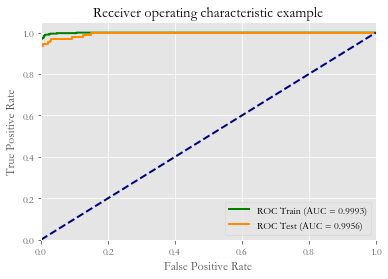

In [21]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### Understanding the Estimated Coefficients

In [22]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
12,result,2.763706
6,contact,1.457318
13,verification_code,1.268256
188,requestBtn_2.0,0.957881
5,company,0.841857
7,email,0.841857
199,siteUrl_https://www.sensorsdata.cn,0.804808
10,name,0.619015
109,utm_campaign_no_utm_compaign,0.476826
205,site_url_others,0.473330


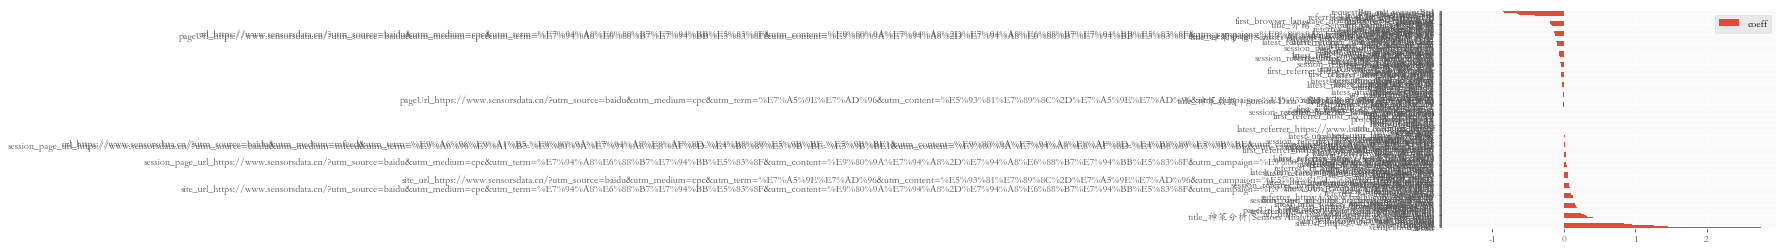

In [23]:
ax = df_coeffs.plot.barh()
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Bagging

#### Single Tree

              train      test
metrics                      
AUC        0.999873  0.966236
Accuracy   0.998618  0.997024
Precision  1.000000  1.000000
Recall     0.968750  0.933333
f1-score   0.984127  0.965517


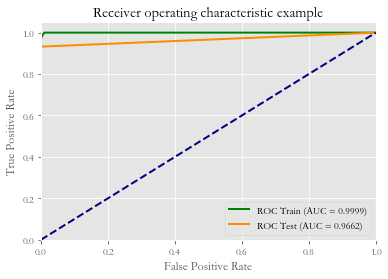

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [25]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


#### Bagged Trees

              train      test
metrics                      
AUC        0.999930  0.973219
Accuracy   0.998618  0.997024
Precision  1.000000  1.000000
Recall     0.968750  0.933333
f1-score   0.984127  0.965517


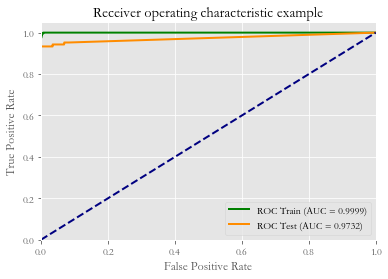

In [26]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 100,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Single KNN

              train      test
metrics                      
AUC        0.998367  0.889427
Accuracy   0.989898  0.977466
Precision  0.973451  0.842105
Recall     0.793269  0.609524
f1-score   0.874172  0.707182


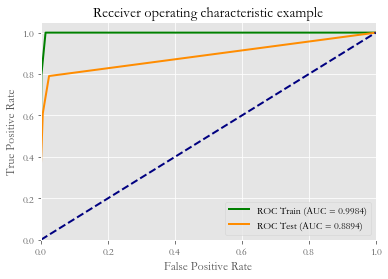

In [27]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Bagged KNN

              train      test
metrics                      
AUC        0.999208  0.923926
Accuracy   0.990430  0.978316
Precision  0.982249  0.864865
Recall     0.798077  0.609524
f1-score   0.880637  0.715084


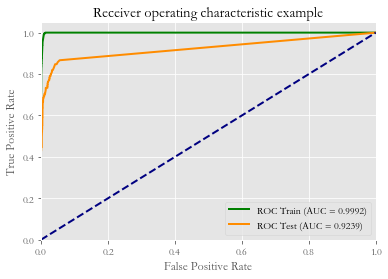

In [28]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.994532  0.986320
Accuracy   0.957252  0.955782
Precision  1.000000  1.000000
Recall     0.033654  0.009524
f1-score   0.065116  0.018868


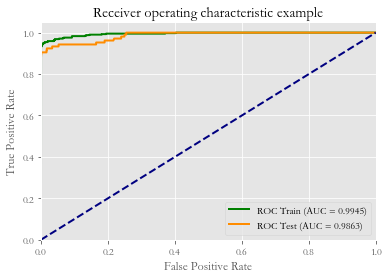

In [29]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
              'max_features': 2,
             # 'criterion': 'gini',
              'max_depth': 5,
              'min_samples_split': 550,
              'min_samples_leaf': 10,    # leaf decrease, n_estimators should increase
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [43]:
# View a list of the features and their importance scores
list(zip(selected_features, clf.feature_importances_))

[('number_of_visit', 0.017118919563910175),
 ('is_first_day', 0.00010192020604910593),
 ('is_first_time', 1.1703533119751798e-07),
 ('screen_height', 0.0010033534559921037),
 ('screen_width', 0.001425791938338496),
 ('company', 0.06896392613433919),
 ('contact', 0.09807663189008402),
 ('email', 0.09053292355285762),
 ('isMsg', 0.0),
 ('isSuccess', 0.0),
 ('name', 0.0017052261714231311),
 ('pageStayTime', 0.0),
 ('result', 0.14282261330158177),
 ('verification_code', 0.09704538207343649),
 ('browser_chrome', 0.0005177260861479179),
 ('browser_firefox', 0.00018388258148075443),
 ('browser_no_brower', 3.7481628524197077e-06),
 ('browser_others', 0.000370910166133855),
 ('browser_safari', 0.00021496737042260772),
 ('first_referrer_https://www.baidu.com/baidu.php', 4.641218205907114e-05),
 ('first_referrer_https://www.baidu.com/link', 3.385070464124527e-05),
 ('first_referrer_https://www.baidu.com/s', 7.551975246546175e-05),
 ('first_referrer_no_first_referrer', 0.0007539510142056348),
 ('f

In [40]:
selected_features

['number_of_visit',
 'is_first_day',
 'is_first_time',
 'screen_height',
 'screen_width',
 'company',
 'contact',
 'email',
 'isMsg',
 'isSuccess',
 'name',
 'pageStayTime',
 'result',
 'verification_code',
 'browser_chrome',
 'browser_firefox',
 'browser_no_brower',
 'browser_others',
 'browser_safari',
 'first_referrer_https://www.baidu.com/baidu.php',
 'first_referrer_https://www.baidu.com/link',
 'first_referrer_https://www.baidu.com/s',
 'first_referrer_no_first_referrer',
 'first_referrer_others',
 'first_referrer_host_m.baidu.com',
 'first_referrer_host_no_first_referrer_host',
 'first_referrer_host_others',
 'first_referrer_host_www.baidu.com',
 'first_browser_language_en',
 'first_browser_language_no_first_browser_language',
 'first_browser_language_others',
 'first_browser_language_zh',
 'latest_referrer_https://www.baidu.com/baidu.php',
 'latest_referrer_https://www.baidu.com/link',
 'latest_referrer_https://www.baidu.com/s',
 'latest_referrer_no_latest_referrer',
 'latest_r

### Gradient Boosting Trees

           train      test
metrics                   
AUC          1.0  0.995005
Accuracy     1.0  0.996173
Precision    1.0  0.980000
Recall       1.0  0.933333
f1-score     1.0  0.956098


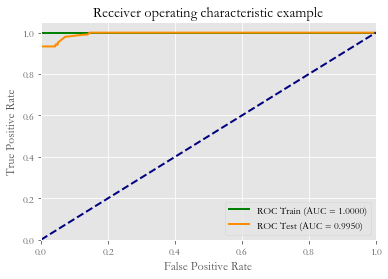

In [30]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.994691  0.982148
Accuracy   0.992344  0.985969
Precision  0.952632  0.891304
Recall     0.870192  0.780952
f1-score   0.909548  0.832487


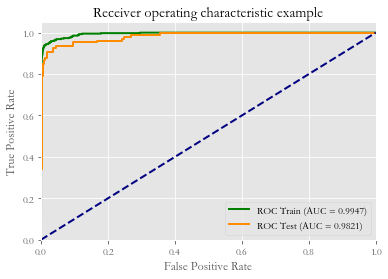

In [31]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5),    # two layers, 5 one each layer
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### SVM

#### Linear SVM

              train      test
metrics                      
AUC        0.948206  0.914063
Accuracy   0.995215  0.991922
Precision  0.994667  0.988636
Recall     0.896635  0.828571
f1-score   0.943110  0.901554


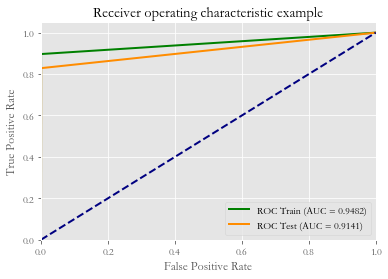

In [32]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM

C:\Users\Kangmin\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


              train      test
metrics                      
AUC        0.997015  0.949497
Accuracy   0.993301  0.982568
Precision  0.973190  0.855556
Recall     0.872596  0.733333
f1-score   0.920152  0.789744


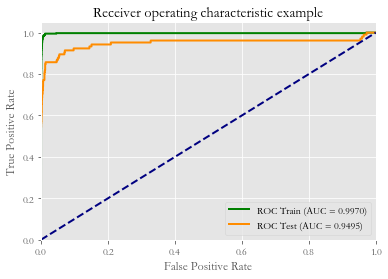

In [33]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.999999  0.993299
Accuracy   0.998618  0.994898
Precision  1.000000  1.000000
Recall     0.968750  0.885714
f1-score   0.984127  0.939394


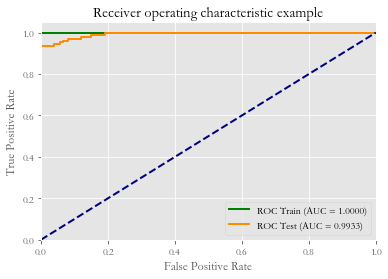

In [35]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Discussion

* All the simulations give a very high accuracy, too good to be true!
* It's probabily because we included feature(s) which are highly correlated with the label, leading to the result that the features have label within intrinsicly.
* Try different set of features without the susbicious ones.